## Purpose and Questions in EDA

> "Doing data analysis requires quite a bit of thinking and we believe that when you’ve completed a good data analysis, you’ve spent more time thinking than doing." - Roger Peng

> "I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water."

1. **Descriptive** - "seeks to summarize a characteristic of a set of data"
2. **Exploratory** - "analyze the data to see if there are patterns, trends, or relationships between variables" (hypothesis generating) 
3. **Inferential** - "a restatement of this proposed hypothesis as a question and would be answered by analyzing a different set of data" (hypothesis testing)
4. **Predictive** - "determine the impact on one factor based on other factor in a population - to make a prediction"
5. **Causal** - "asks whether changing one factor will change another factor in a population - to establish a causal link" 
6. **Mechanistic** - "establish *how* the change in one factor results in change in another factor in a population - to determine the exact mechanism"

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import math
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

In [7]:
housing_data = pd.read_csv('../data/housing_price.csv')

In [8]:
housing_data.shape

(1460, 81)

### Data Snooping Bias
  * Before we decide on what algorithm to use on the data set, we have understand a lot about the data. If we look at whole dataset, we might stuble upon some seemingly interesting patterns in data that leads you to select a particular kind of Machine Learning Algorithm. This kind of approach **may fail** as the ML model may not be able generalize well on unseen datasets. 
      * The concept of understanding whole data (with out keeping testset aside) is know as Data Snooping.
      * The concept of unable to generalize well on unseen datasets **due to Data Snooping** is know as Data Snooping Bias.
  * <p>To avoid this "Data Snooping Bias", we have to split dataset into TRAIN, TEST. Do exploratory data analysis, train ML algorithm on TRAIN set, test the model on unseen TEST dataset. (kind of simulating production data)</p>

### Stratified Sampling 

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['MSSubClass']):
    housing_train_set = housing_data.loc[train_index]
    housing_test_set = housing_data.loc[test_index]

In [10]:
housing_test_set.shape

(292, 81)

### Random Sampling

In [11]:
# 80% of housing_data.shape[0] = 1168
max_index = housing_data.shape[0] - 1
numbers = max_index*80//100
train_indexs = np.linspace(start=0, stop=max_index, num=numbers, dtype=int)
print(train_indexs)

[   0    1    2 ..., 1456 1457 1459]


In [12]:
test_indexs = [x for x in range(max_index) if x not in train_indexs]
print(len(test_indexs))

293


In [13]:
housing_train_set = housing_data.loc[train_indexs]
housing_test_set = housing_data.loc[test_indexs]

In [14]:
housing_test_set.shape

(293, 81)

In [15]:
housing_train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

###  As part of data analysis we refine the data - below are some common activities we do.

- **Missing : ** Check for missing or incomplete data, impute/fillna with appropriate data
- **Quality : ** Check for duplicates, accuracy, unusual data.
- **Parse : ** Prase existing data and create new fearures. e.g. Extract year and month from date
- **Convert : ** Free text to coded value (LabelEncoder, One-Hot-Encoding or LabelBinarizer)
- **Derive** Derive new feature out of existing featre/fearues e.g. gender from title Mr. Mrs.
- **Calculate** percentages, proportion
- **Remove** Remove redundant or not so useful data
- **Merge** Merge multiple columns e.g. first and surname for full name
- **Aggregate** e.g. rollup by year, cluster by area
- **Filter** e.g. exclude based on location
- **Sample** e.g. extract a representative data
- **Summary** Pandas describe function or stats like mean

** Missing data :** By “missing” data we simply mean null or “not present for whatever reason”. Lets see if we can find the missing data in our data set either because it exists and was not collected or it never existed

In [16]:
housing_train_set.count()

Id               1167
MSSubClass       1167
MSZoning         1167
LotFrontage       952
LotArea          1167
Street           1167
Alley              74
LotShape         1167
LandContour      1167
Utilities        1167
LotConfig        1167
LandSlope        1167
Neighborhood     1167
Condition1       1167
Condition2       1167
BldgType         1167
HouseStyle       1167
OverallQual      1167
OverallCond      1167
YearBuilt        1167
YearRemodAdd     1167
RoofStyle        1167
RoofMatl         1167
Exterior1st      1167
Exterior2nd      1167
MasVnrType       1161
MasVnrArea       1161
ExterQual        1167
ExterCond        1167
Foundation       1167
                 ... 
BedroomAbvGr     1167
KitchenAbvGr     1167
KitchenQual      1167
TotRmsAbvGrd     1167
Functional       1167
Fireplaces       1167
FireplaceQu       624
GarageType       1099
GarageYrBlt      1099
GarageFinish     1099
GarageCars       1167
GarageArea       1167
GarageQual       1099
GarageCond       1099
PavedDrive

In [17]:
housing_train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1167.000000,1167.000000,952.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1161.000000,1167.000000,...,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,730.000857,57.283633,70.393908,10623.948586,6.127678,5.585261,1971.371894,1985.310197,106.795866,450.654670,...,94.000857,48.946872,21.394173,3.428449,16.934019,2.958012,50.594687,6.366752,2007.830334,182825.841474
std,421.706438,42.408100,25.265765,9208.434346,1.384172,1.118711,30.333800,20.443910,185.696403,470.609181,...,125.355019,69.336952,61.039794,30.175953,59.351266,41.666269,552.451967,2.700141,1.329958,81977.102916
min,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7597.500000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,730.000000,50.000000,70.000000,9571.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,387.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164990.000000
75%,1094.500000,70.000000,80.000000,11765.500000,7.000000,6.000000,2001.000000,2004.000000,170.000000,715.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
housing_train_set.count()['PoolQC']

6

In [19]:
def getMissingDataFeatures(df):
    ser_counts = df.count()
    data_size = len(df)
    data_missing_features = []
    for idx in ser_counts.index:
        if(ser_counts[idx] < data_size):
            data_missing_features.append(idx)
    return data_missing_features

In [20]:
# place all these features in excel and get discriptions, see if any of them are useful in predecting house price
print(getMissingDataFeatures(housing_train_set))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


How can we handle these missing value?
        * Drop these rows / columns? Use .dropna(how='any')
        * Fill with a dummy value? Use .fillna(value=dummy)
        * Impute the cell with the most recent value? Use .fillna(method='ffill')
        * Interpolate the amount in a linear fashion? Use .interpolate() 
        * model based imputation

In [21]:
# dropna(axis=1, how='all') - Drop the columns where all elements are nan
# dropna(axis=1, how='any') - Drop the columns where any of the elements is nan
housing_train_set.dropna(axis=1, how='any').head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000


In [22]:
housing_train_set[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

#### Handling missing values in a numeric feature
    * Look at the distribution of the data.
        * We can fill all numeric features with mean value. This is not right, we have to do some analysis before imputing/fillna. Below are two of them.
        * If data is normally distributed we impute/fillna with mean.
        * If data is partially normal distributed, there are outliers. Then go with median/mode. 

In [23]:
# fill mean for the numeric features.
housing_train_set.fillna(value=housing_train_set.mean()[['LotFrontage','MasVnrArea', 'GarageYrBlt']]).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


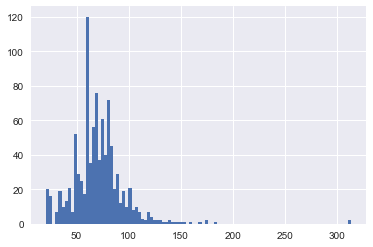

In [24]:
housing_train_set['LotFrontage'].hist(bins=100)

In [25]:
# Data is close to normal, around 350 items are close to 75, the mean is 70. Hence we can fillna with mean.
housing_train_set['LotFrontage'].mean()

70.39390756302521

In [26]:
housing_train_set.fillna(value=housing_train_set.mean()[['LotFrontage']], inplace=True).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [27]:
housing_train_set[housing_train_set.LotFrontage.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


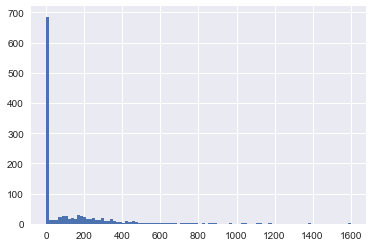

In [28]:
housing_train_set['MasVnrArea'].hist(bins=100)

In [29]:
# most of the data is at zero, I think it is appropriate fillna with zero. Means there is no masonry(stone work) veneer area in square feet
housing_train_set['MasVnrArea'].fillna(value=0, inplace=True)